In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
file_id = 'https://docs.google.com/spreadsheets/d/14MiwEhUyI31HmKHY3sMO4mPkPUPUwmm6/edit?usp=drive_link&ouid=113544346438304110369&rtpof=true&sd=true'  # Replace with your actual file ID
file_path = f'/content/gdrive/MyDrive/Finance project Python/us economic uncertainity.xlsx'  # Replace with your actual file ID


df = pd.read_excel(file_path)

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming the time series column is named 'data'
time_series = df['Mid Price']

# Fit ARMA model
model = ARIMA(time_series, order=(2, 1, 2))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Mid Price   No. Observations:                 1825
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10224.515
Date:                Thu, 06 Jul 2023   AIC                          20459.030
Time:                        17:54:00   BIC                          20486.574
Sample:                             0   HQIC                         20469.191
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2603      0.593     -0.439      0.661      -1.423       0.903
ar.L2          0.1023      0.096      1.065      0.287      -0.086       0.290
ma.L1         -0.4196      0.595     -0.706      0.4

In [6]:
# Generate predictions
predictions = model_fit.predict()


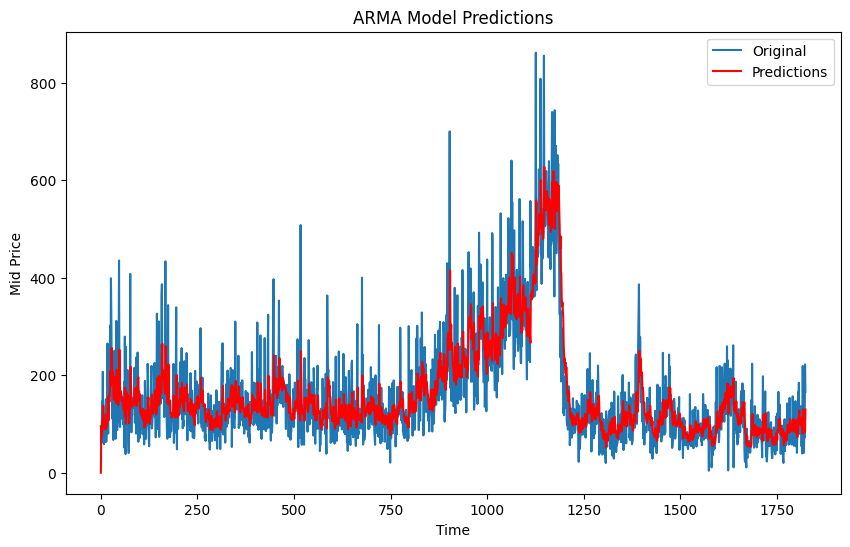

In [7]:
# Plot the figure
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.legend()
plt.show()


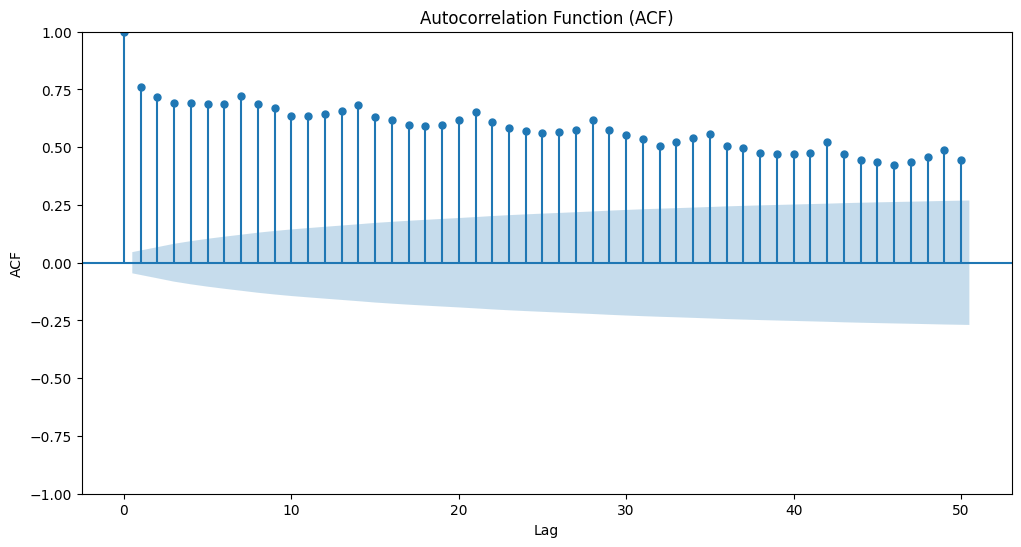

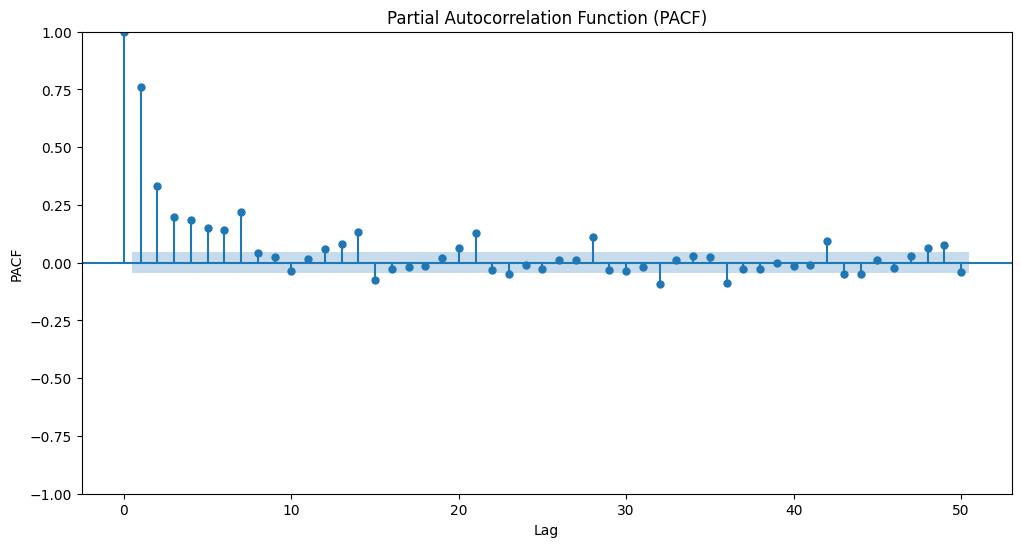

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(time_series, lags=50, ax=ax)
ax.set(title='Autocorrelation Function (ACF)', xlabel='Lag', ylabel='ACF')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(time_series, lags=50, ax=ax)
ax.set(title='Partial Autocorrelation Function (PACF)', xlabel='Lag', ylabel='PACF')
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test
result = adfuller(time_series)

# Extract and print ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'    {key}: {value}')


ADF Statistic: -2.7129590059669506
p-value: 0.07182251516198263
Critical Values:
    1%: -3.4339840952648695
    5%: -2.8631452508003057
    10%: -2.567624583142913


ADF Statistic: -2.7129590059669355\
p-value: 0.07182251516198512

Critical Values:

1%: -3.4339840952648695

5%: -2.8631452508003057

10%: -2.567624583142913

We can interpret the results as follows:

ADF Statistic: The ADF statistic value of -2.7129590059669355 is less negative than the critical values at the 1%, 5%, and 10% significance levels. This suggests that we fail to reject the null hypothesis of non-stationarity. The ADF statistic being less negative indicates that the time series may not be strongly stationary.

p-value: The p-value of 0.07182251516198512 is greater than the common significance level of 0.05. This further supports our conclusion of failing to reject the null hypothesis. A higher p-value indicates weaker evidence against the null hypothesis of non-stationarity.

Critical Values: The critical values represent the thresholds below which we can reject the null hypothesis. In this case, the ADF statistic does not fall below the critical values at the 1%, 5%, and 10% levels. Therefore, we fail to reject the null hypothesis.

In summary, based on the ADF test results, we do not have sufficient evidence to conclude that the time series is stationary. The data may exhibit some degree of non-stationarity. However, the results are not definitive, and further analysis or exploration of the data may be necessary to make a conclusive determination about its stationarity.

To make the time series stationary, To improve the stationarity of the time series, you can consider applying the following methods:\
**Detrending:** If there is a clear trend in the data, you can try removing the trend component using regression or other detrending techniques. This can help make the time series stationary. After detrending, perform the ADF test to confirm stationarity.

In [10]:
# Assuming you have the time series data stored in the variable 'time_series'

# Create a time index
time_index = pd.date_range(start='6/17/2023', periods=len(time_series), freq='D')

# Convert time index to numeric representation
time_numeric = (time_index - time_index[0]).days

# Create a DataFrame with the time series data and time index
df = pd.DataFrame({'Time': time_numeric, 'Value': time_series})

# Add a constant column for the regression intercept
df['Intercept'] = 1

# Fit a linear regression model to the data
model = sm.OLS(df['Value'], df[['Intercept', 'Time']])
results = model.fit()

# Get the trend component from the regression results
trend_component = results.predict(df[['Intercept', 'Time']])

# Detrend the time series by subtracting the trend component
detrended_series = df['Value'] - trend_component

# Print the detrended series
print(detrended_series)


0       -72.657501
1      -107.990234
2       -96.422967
3       -22.815700
4       -59.838433
           ...    
1820   -114.651655
1821    -75.054388
1822    -83.727121
1823     66.660146
1824     10.477413
Length: 1825, dtype: float64


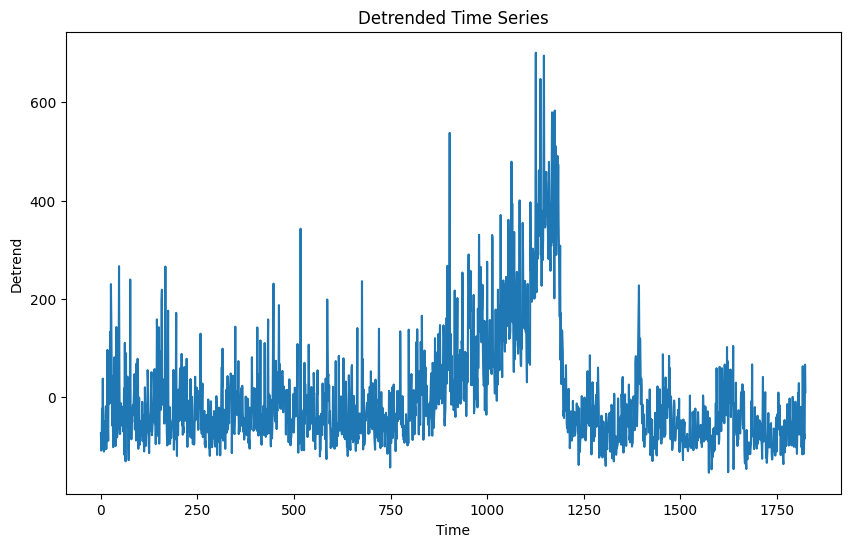

In [11]:
# Plot the log-differenced time series
plt.figure(figsize=(10, 6))
plt.plot(detrended_series)
plt.title('Detrended Time Series')
plt.xlabel('Time')
plt.ylabel('Detrend')
plt.show()

ADF Test of the transformed data

In [12]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have the transformed log-differenced time series stored in the variable 'log_diff_time_series'

# Perform ADF test
result = adfuller(detrended_series)

# Extract and print ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'    {key}: {value}')


ADF Statistic: -2.7206507383437244
p-value: 0.07053245170027753
Critical Values:
    1%: -3.4339840952648695
    5%: -2.8631452508003057
    10%: -2.567624583142913


**Akaike’s Information Criterion (AIC)**\
This criterion is useful for selecting the order (p,d,q) of an ARIMA model. The AIC is expressed as:\
**AIC=-2log(L)+2k**\
Where L is the likelihood of the data and k is the number of parameters.

In practice, we select the model with the lowest AIC compared to other models.

It is important to note that the AIC cannot be used to select the order of differencing (d). Differencing the data will the change the likelihood (L) of the data. The AIC of models with different orders of differencing are therefore not comparable.

Also, notice that since we select the model with the lowest AIC, more parameters will increase the AIC score and thus penalize the model. While a model with more parameters could perform better, the AIC is used to find the model with the least number of parameters that will still give good results.

A final note on AIC is that it can only be used relative to other models. A small AIC value is not a guarantee that the model will have a good performance on unsee data, or that its SSE will be small.

Result is not so good, we'll Moving Average Smoothing Technique

Applying Moving Average Smoothing technique

In [13]:
# Define the window size for the moving average
window_size = 7

# Apply moving average smoothing to the time series
smoothed_series = time_series.rolling(window=window_size).mean()

# Print the smoothed series
print(smoothed_series)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1820     84.491429
1821     88.252857
1822     85.737143
1823    111.804286
1824    104.225714
Name: Mid Price, Length: 1825, dtype: float64


In [14]:
# Drop any rows with missing values
smoothed_series_cleaned = smoothed_series.dropna()

# Perform ADF test
result = adfuller(smoothed_series_cleaned)

# Extract and print ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'    {key}: {value}')

ADF Statistic: -2.90560012128867
p-value: 0.04470064440151602
Critical Values:
    1%: -3.434002362895342
    5%: -2.863153315036348
    10%: -2.5676288771043367


In [15]:
pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 32.5 MB/s eta 0:00:00


In [16]:
import pandas as pd
from arch.breaks import baiperron

# Read the Excel file into a DataFrame
data = pd.read_excel('/content/gdrive/MyDrive/Finance project Python/us economic uncertainity.xlsx')

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Sort the data by the index (date)
data.sort_index(inplace=True)

# Perform the Bai and Perron test
results = baiperron(data['Mid Price'])

# Print the test results
print(results.summary().as_text())


ModuleNotFoundError: ignored

In [ ]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df


In [ ]:
from itertools import product

ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

# Create a list with all possible combinations of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)
order_list = []
for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)

# Replace 'data' with your actual dataset or DataFrame
my_dataset = pd.read_excel('/content/gdrive/MyDrive/Finance project Python/us economic uncertainity.xlsx')  # Example: Read from an Excel file
exog_variable = my_dataset['Mid Price']

result_df = optimize_ARIMA(order_list, exog=exog_variable)
result_df


  0%|          | 0/64 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(7, 1, 7)",20287.032907
1,"(7, 1, 5)",20295.519637
2,"(7, 1, 6)",20295.774217
3,"(6, 1, 5)",20297.747802
4,"(4, 1, 5)",20311.139954
...,...,...
59,"(4, 1, 0)",20576.307078
60,"(3, 1, 0)",20627.737892
61,"(2, 1, 0)",20711.444622
62,"(1, 1, 0)",20819.961076


Once the function is done running, you should see that the order associated with the lowest AIC is (7,1,7). Therefore, this suggests are ARIMA model with an AR(7) process and a MA(7) process.

Now, we can print a summary of the best model, which an ARIMA (7,1,7).

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have the time series data stored in the variable 'time_series'

# Fit the ARIMA model with (p,d,q) = (7,1,7)
p = 7
d = 1
q = 7
arima_model = ARIMA(time_series, order=(p, d, q))
arima_model_fit = arima_model.fit()

# Print the summary of the ARIMA model
print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Mid Price   No. Observations:                 1825
Model:                 ARIMA(7, 1, 7)   Log Likelihood              -10128.516
Date:                Sun, 25 Jun 2023   AIC                          20287.033
Time:                        12:42:38   BIC                          20369.665
Sample:                             0   HQIC                         20317.515
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6162      0.128     -4.827      0.000      -0.866      -0.366
ar.L2         -0.5855      0.126     -4.654      0.000      -0.832      -0.339
ar.L3         -0.8299      0.048    -17.291      0.0

Based on the provided information, we can draw the following conclusions:

Ljung-Box (L1) (Q): The Ljung-Box test is a statistical test used to examine the presence of autocorrelation in the residuals of a time series model. In this case, the test statistic (Q) is 0.01, and the probability (Prob(Q)) is 0.94. Since the probability is high (greater than the significance level of 0.05), we do not have sufficient evidence to reject the null hypothesis of no autocorrelation. This suggests that there is no significant autocorrelation in the residuals.

Jarque-Bera (JB): The Jarque-Bera test is a statistical test used to assess the normality of the data based on skewness and kurtosis. The test statistic (JB) is 1953.49, and the probability (Prob(JB)) is 0.00. The very low probability indicates that the data significantly deviates from a normal distribution. Therefore, we can conclude that the data is not normally distributed.

Heteroskedasticity (H): The test for heteroskedasticity assesses whether the variability of the errors in a regression model is not constant. In this case, the test statistic (H) is 0.45, and the probability (Prob(H)) is 0.00. The low probability suggests evidence of heteroskedasticity, indicating that the variability of the errors is not constant.

Skewness and Kurtosis: Skewness measures the asymmetry of the data distribution, and a value of 1.16 suggests a positive skew, indicating that the data is skewed to the right. Kurtosis measures the thickness of the tails of the data distribution, and a value of 7.51 suggests heavy tails, indicating that the data has more outliers or extreme values than a normal distribution.

In summary, based on the provided results, we can conclude that the data does not follow a normal distribution, shows evidence of heteroskedasticity, and has positive skewness and heavy tails.